In [3]:
import datetime as dt
import time
import sys

from module_marche import DonneeMarche
from module_option import Option
from module_arbre_noeud import Arbre
from module_grecques_empiriques import GrecquesEmpiriques
from module_barriere import Barriere

from module_enums import ConventionBaseCalendaire, TypeBarriere, DirectionBarriere


sys.setrecursionlimit(1000000000)

start = time.time()
    
#today = dt.date.today()
#today_1y = dt.date(today.year+1, today.month, today.day)
today = dt.date(2024,3,1)
today_1y = dt.date(2024,12,26)

spot = 100
vol = 0.21
discount_rate = risk_free = 0.03
#dividende_ex_date = dt.date(today.year+1, today.month-6, today.day) 
dividende_ex_date = dt.date(2024,6,15) 
dividende_montant = 0

strike = 101
expiry = today_1y 

nb_pas = 6

donnée = DonneeMarche(today, spot, vol, discount_rate, risk_free, dividende_ex_date=dividende_ex_date, dividende_montant=dividende_montant)

barriere = Barriere(120, type_barriere=TypeBarriere.knock_in, direction_barriere=DirectionBarriere.up)
# barriere = Barriere(0,None,None)

option = Option(maturite = expiry, prix_exercice = strike, barriere=barriere, call = True, date_pricing = today, americaine=True)

arbre = Arbre(nb_pas, donnée, option, pruning = True)
    
arbre.pricer_arbre()

done = time.time()

diff_temps = done - start

print(f"Prix option {arbre.prix_option}")
print(f'Temps pricing (secondes): {round(diff_temps, 1)}')

Prix option 4.809949775327234
Temps pricing (secondes): 0.0


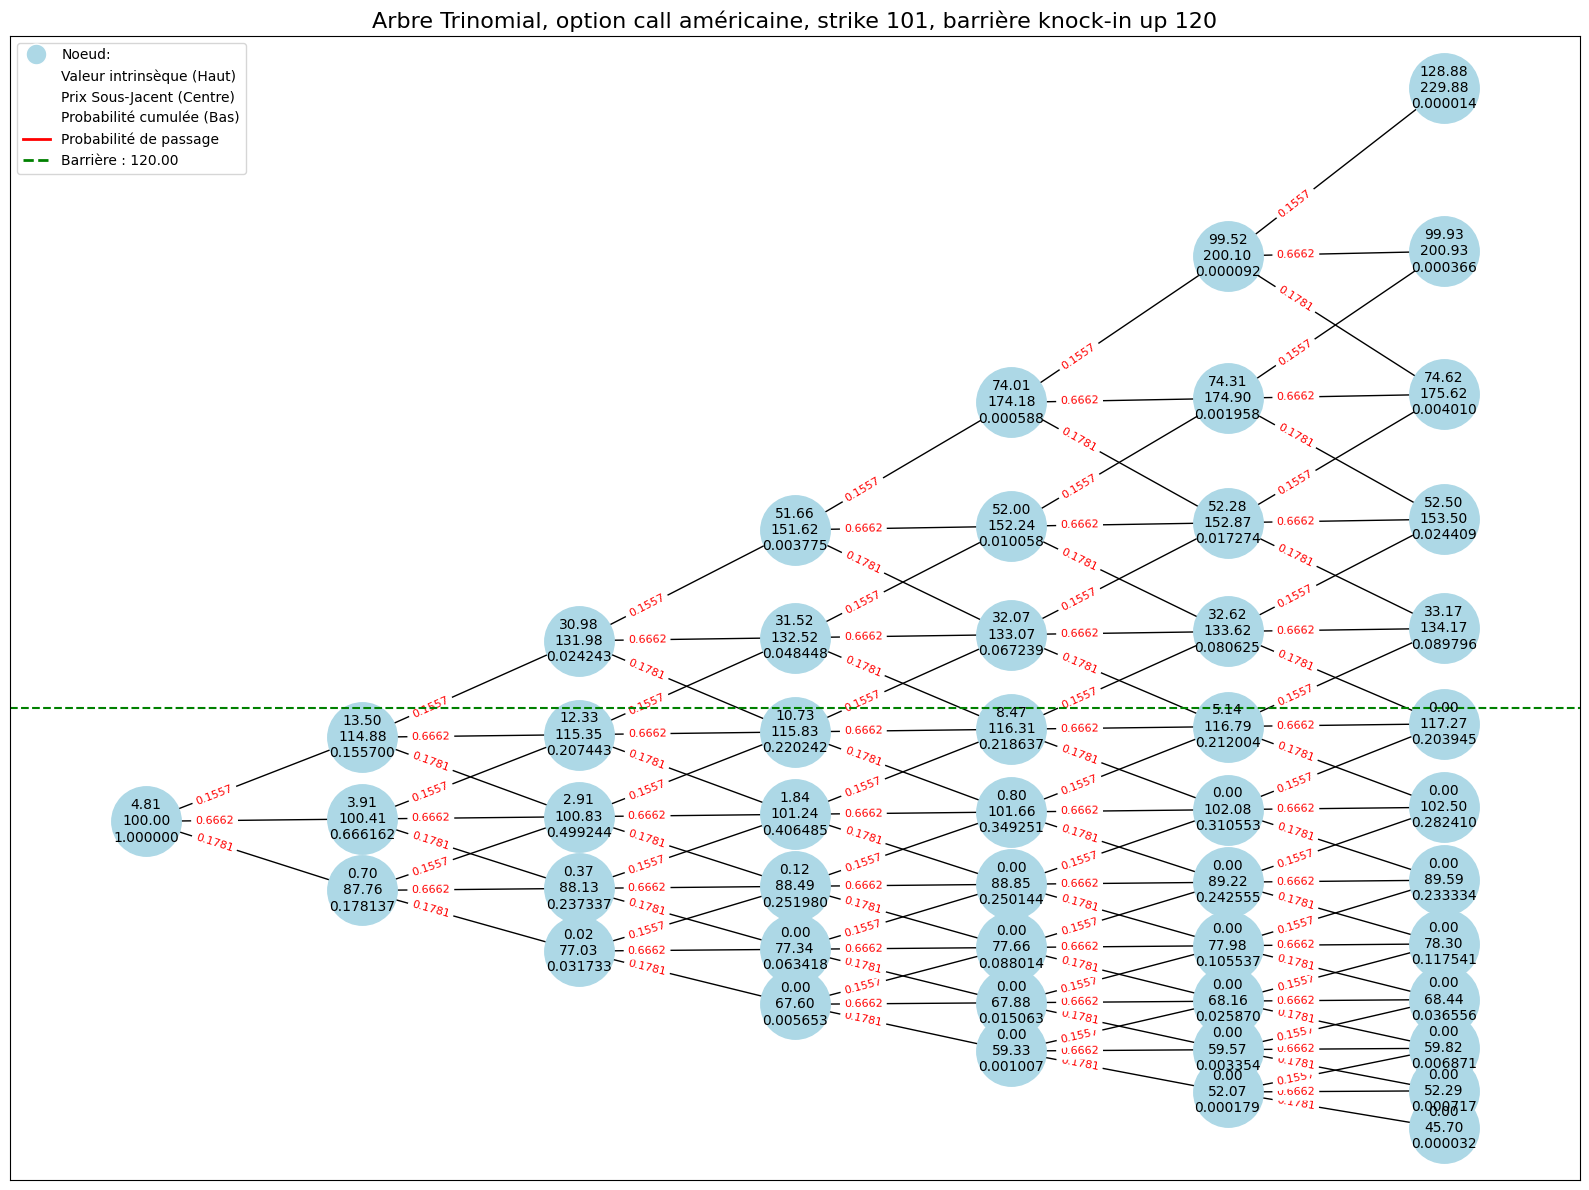

In [4]:
from module_graphique import Arbre_Graph

graph = Arbre_Graph(arbre=arbre)
graph.afficher_arbre()

In [2]:
import datetime as dt
import time
import sys

from module_marche import DonneeMarche
from module_option import Option
from module_arbre import Arbre
from module_grecques_empiriques import GrecquesEmpiriques

sys.setrecursionlimit(1000000000)

start = time.time()
    
#today = dt.date.today()
#today_1y = dt.date(today.year+1, today.month, today.day)
today = dt.date(2024,3,1)
today_1y = dt.date(2024,12,26)

spot = 100
vol = 0.30
discount_rate = risk_free = 0.15
#dividende_ex_date = dt.date(today.year+1, today.month-6, today.day) 
dividende_ex_date = dt.date(2024,6,15) 
dividende_montant = 3

strike = 101
expiry = today_1y 

nb_pas = 300

donnée = DonneeMarche(today, spot, vol, discount_rate, risk_free, dividende_ex_date=dividende_ex_date, dividende_montant=dividende_montant)
option = Option(maturite = expiry, prix_exercice = strike, call = True, date_pricing = today, americaine=True)


In [ ]:
list_valeur = []
list_x = range(440,460,1)

for p in list_x : 
    arbre = Arbre(p, donnée, option, pruning = True)
        
    arbre.pricer_arbre()

    list_valeur.append(arbre.prix_option)

    print(f"Nombre de pas {p}")
    print(f"Prix option {arbre.prix_option}")

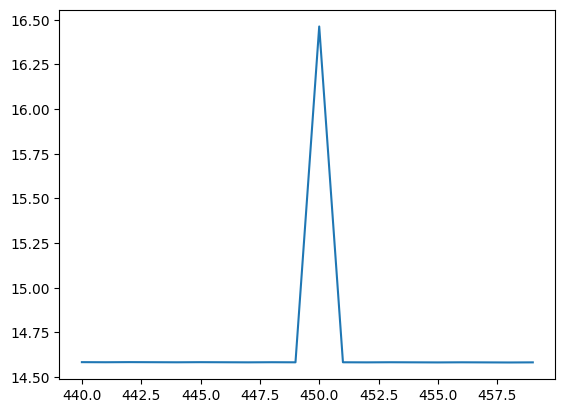

In [22]:
import matplotlib.pyplot as plt

plt.plot(list_x, list_valeur)


In [2]:
grecques = GrecquesEmpiriques(arbre=arbre)

def grecques_all (grecques : GrecquesEmpiriques) -> str : 
    print(f"Delta : {grecques.approxime_delta()}")
    print(f"Gamma : {grecques.approxime_gamma()}")
    print(f"Vega : {grecques.approxime_vega()}")
    print(f"Theta : {grecques.approxime_theta()}")
    print(f"Rho : {grecques.approxime_rho()}")
    
grecques_all(grecques)

Delta : 0.715555583197979
Gamma : -1.2789769243681803e-13
Vega : 0.3073222245562075
Theta : -0.03933541622748393
Rho : 0.44902222084128773
